# Plot

In [58]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import itertools

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disabpd.option_context('display.max_columns', 300)le copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.4)
cm = plt.colormaps['RdYlBu']

In [59]:
from latex2sympy2 import latex2sympy, latex2latex
import sympy as sp
x = sp.symbols('x')
MT = sp.symbols(r'm_{\tilde{t}}')
yDM = sp.symbols(r'y_{DM}')
gs = sp.symbols(r'g_s')

coeffs_tex = {
    'C_g'  : r"-\frac{g_s y_{DM}^2}{384 \pi^2} \frac{1}{m_{\tilde{t}}^2} \frac{1}{\left( 1-x \right)^4}\left[ 1 - 6 x + 3 x^2 + 2 x^3 - 6 x^2 \log(x) \right]",
    "C_{G3}" : r"\frac{g_s^3}{5760 \pi^2} \frac{1}{m_{\tilde{t}}^2}",
    "C_{q}^{LV}" : r"-\frac{g_s^4}{960 \pi^2} \frac{1}{m_{\tilde{t}}^2}",
    "C_{q}^{RV}" : r"-\frac{g_s^4}{960 \pi^2} \frac{1}{m_{\tilde{t}}^2} + \frac{g_s^2 y_{DM}^2}{576 \pi^2} \frac{1}{m_{\tilde{t}}^2} \frac{1}{\left( 1-x \right)^4}\left[ 2 - 9 x + 18 x^2  - 11 x^3 + 6 x^3 \log(x) \right]",
    "C_{q}^{RR}" : r"\frac{y_{DM}^4}{2304 \pi^2} \frac{1}{m_{\tilde{t}}^2} \frac{1}{\left( 1-x \right)^4}\left[ 2 - 9 x + 18 x^2  - 11 x^3 + 6 x^3 \log(x) \right]",
    "C_{t}^{LL}" : r"-\frac{g_s^4}{5760 \pi^2} \frac{1}{m_{\tilde{t}}^2}",
    "C_{t}^{RR}" : r"-\frac{g_s^4}{5760 \pi^2} \frac{1}{m_{\tilde{t}}^2} + \frac{g_s^2 y_{DM}^2}{1728 \pi^2} \frac{1}{m_{\tilde{t}}^2} \frac{1}{\left( 1-x \right)^4}\left[ 2 - 9 x + 18 x^2  - 11 x^3 + 6 x^3 \log(x) \right] + \frac{y_{DM}^4}{1152 \pi^2} \frac{1}{m_{\tilde{t}}^2} \frac{1}{\left( 1-x \right)^4} \left[ -7 - 36 x + 99 x^2 - 56x^3 + 6 x \left( -6 + 3 x + 4 x^2 \right) \log(x)\right]",
    "C_{t}^{LR}" : r"-\frac{g_s^4}{960 \pi^2} \frac{1}{m_{\tilde{t}}^2} +  \frac{g_s^2 y_{DM}^2}{576 \pi^2} \frac{1}{m_{\tilde{t}}^2} \frac{1}{\left( 1-x \right)^4}\left[ 2 - 9 x + 18 x^2  - 11 x^3 + 6 x^3 \log(x) \right]"}

In [60]:
coeffs_sympy = {coeff_label : latex2sympy(tex.replace(r'\log(x)',r'L(x)')) for coeff_label,tex in coeffs_tex.items()}

In [61]:
coeffs_func = {}
for coeff,c_sympy in coeffs_sympy.items():
    f = sp.lambdify([gs,yDM,MT,x],c_sympy,[{'L' : np.log},'numpy'])
    # f = lambda gs_v,yDM_v,MT_v,x_v: c_sympy.subs({gs : gs_v, yDM : yDM_v, MT : MT_v, x : x_v, sp.pi : 3.14})
    coeffs_func[coeff] = f
    try:
        print(coeff,f(0.1,3.0,500.,0.2))
    except:
        print(coeff,c_sympy)

C_g -7.473514085928192e-10
C_{G3} 7.036193308495681e-14
C_{q}^{LV} -4.221715985097408e-14
C_{q}^{RV} 1.16644576945167e-10
C_{q}^{RR} 2.6254528673629038e-08
C_{t}^{LL} -7.036193308495681e-15
C_{t}^{RR} -3.9467728071167105e-08
C_{t}^{LR} 1.16644576945167e-10


In [62]:
MTvList = np.linspace(200.,2500.,20)
Mn1vList = np.linspace(200.,2500.,20)
yDMv = 0.1
gsv = 1.1

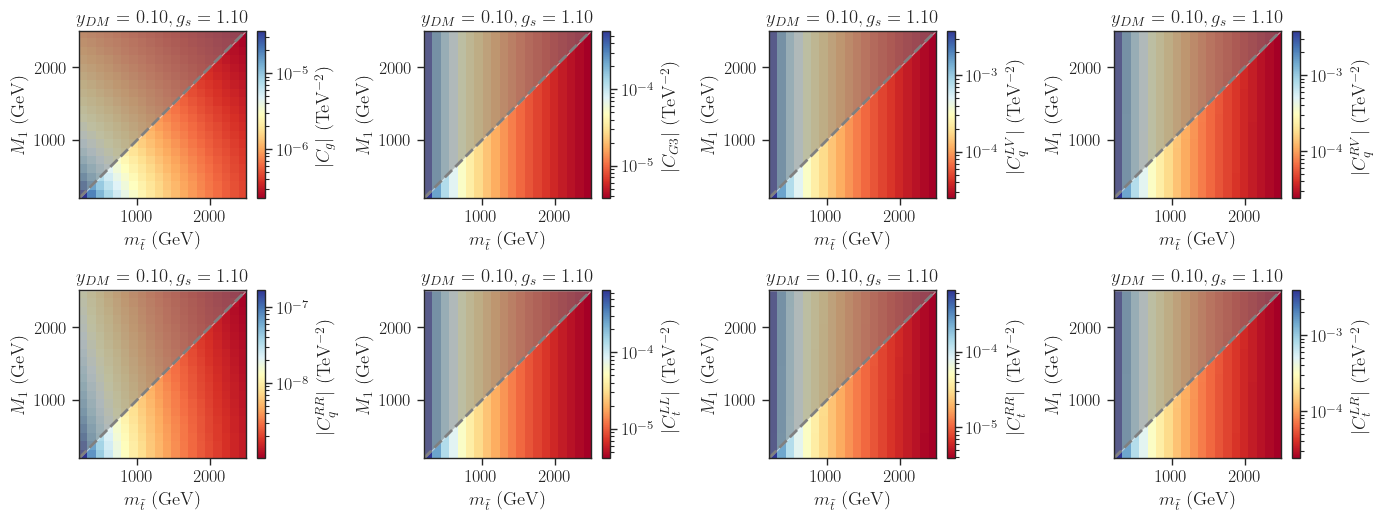

In [64]:
fig,axes = plt.subplots(nrows=int(len(coeffs_tex)/4),ncols=4,figsize=(14,2.7*int(len(coeffs_tex)/4)))
axarr = np.array(axes).reshape(-1)
for i,coeff_label in enumerate(coeffs_func.keys()):
    ax = axarr[i]
    coeff_func = coeffs_func[coeff_label]
    pts = []
    for MTv,Mn1v in itertools.product(MTvList,Mn1vList):
        if Mn1v == MTv:
            Mn1v = MTv-0.5
        pts.append([MTv,Mn1v,coeff_func(gsv,yDMv,MTv,(Mn1v/MTv)**2)])
    pts = np.array(pts,dtype=float)    

    x = MTvList
    y = Mn1vList
    z = np.abs(-pts[:,2])*1e6 # Convert to TeV
    znew = np.reshape(z,(len(x),len(y)))
    im = ax.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                    cmap=cm,aspect='auto',norm=LogNorm(vmin=z.min(),vmax=z.max()))
    plt.colorbar(im,label=r'$|%s|$ (TeV$^{-2}$)'%coeff_label)
    ax.set_xlabel(r'$m_{\tilde t}$ (GeV)')
    ax.set_ylabel(r'$M_{1}$ (GeV)')
    # plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

    # contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
    ax.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
    ax.fill_between(x, x, y.max(), facecolor='gray', alpha=0.5)
    # plt.text(1000.,2000.,r'$m_{T} < m_{\chi}$',fontsize=23,c='black',alpha=0.6)
    # plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
    # plt.xlim(200,2500)
    ax.set_title(r'$y_{DM} = %1.2f, g_s = %1.2f$' %(yDMv,gsv))
    # plt.tight_layout()
    # plt.savefig('Cg_values.png')
plt.tight_layout()
plt.savefig('stopR_eft_coeffs.png')
plt.show()